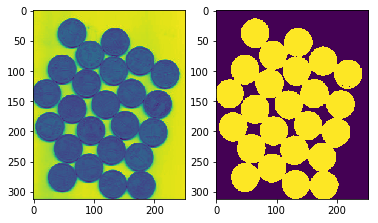

In [6]:
# load image and use ploting to do the things
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread('water_coins.jpg',0) # gray is a must
# threshold the image 
ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(thresh)
plt.show()



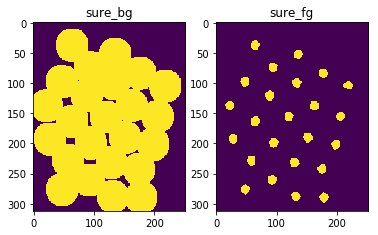

In [8]:
# the inverse threshold works
kernel=np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.subplot(211),plt.imshow(unknown)
plt.title('unknown')
plt.subplot(212),plt.imshow(thresh)
plt.title('thresh')
plt.subplot(121),plt.imshow(sure_bg)
plt.title('sure_bg')
plt.subplot(122),plt.imshow(sure_fg)
plt.title('sure_fg')

plt.show()


In [12]:
from cv2 import watershed


In [32]:
# img=cv2.imread('water_coins.jpg',0)
# img=np.array([1,2,3,4])
img=cv2.imread('water_coins.jpg')

watershed(img,sure_fg)

error: C:\projects\opencv-python\opencv\modules\imgproc\src\segmentation.cpp:161: error: (-215) src.type() == (((0) & ((1 << 3) - 1)) + (((3)-1) << 3)) && dst.type() == (((4) & ((1 << 3) - 1)) + (((1)-1) << 3)) in function cv::watershed
